In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# here we are importing all the necessary packages that are used
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models, similarities, matutils
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity


### Import cleaned datasets

In [ ]:
df_train_s = pd.read_csv('/content/drive/MyDrive/MIS6-Sem6/outputs/df_test.csv')
# df_test_s = pd.read_csv('df_test.csv')

In [ ]:
# printing the info of the trained csv file
df_train_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46132 entries, 0 to 46131
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   drugName     46132 non-null  object 
 1   condition    46132 non-null  object 
 2   rating       46132 non-null  float64
 3   usefulCount  46132 non-null  int64  
 4   review       46130 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
#drop Nan value
df_train_s.dropna(inplace=True)

In [ ]:
df_train_s.reset_index(inplace=True)

In [ ]:
df_train_s['condition']

0                          Depression
1        Crohn's Disease, Maintenance
2             Urinary Tract Infection
3                         Weight Loss
4                       Birth Control
                     ...             
46125                   Birth Control
46126                         Anxiety
46127                   Birth Control
46128                            Pain
46129                        Sciatica
Name: condition, Length: 46130, dtype: object

In [ ]:
df_train_s['drugName']

0            Mirtazapine
1             Mesalamine
2                Bactrim
3               Contrave
4        Cyclafem 1 / 35
              ...       
46125               Apri
46126       Escitalopram
46127     Levonorgestrel
46128         Tapentadol
46129          Arthrotec
Name: drugName, Length: 46130, dtype: object

In [ ]:
drug_list = df_train_s['drugName'].tolist()

In [ ]:
condition_list=df_train_s['condition'].tolist()

In [ ]:
corpus_train=df_train_s.review
# corpus_test=df_test_s.review


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#custom stopwords
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
n = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't",
     "mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in n:
    stop.remove(i)

a = ['mg', 'week', 'month', 'day', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 
     'august', 'september','october','november','december', 'iv','oral','pound',]
for j in a:
    stop.add(j)

### CountVectorizer

In [ ]:
# Create a CountVectorizer for parsing/counting words
cv = CountVectorizer(ngram_range=(2, 2), min_df=10, max_df=0.8)

cv.fit(corpus_train)

CountVectorizer(max_df=0.8, min_df=10, ngram_range=(2, 2))

In [ ]:
doc_word = cv.transform(corpus_train).transpose()

In [ ]:
pd.DataFrame(doc_word.toarray(), cv.get_feature_names()).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,46120,46121,46122,46123,46124,46125,46126,46127,46128,46129
abdominal area,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdominal cramp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdominal cramping,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdominal discomfort,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdominal pain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
corpus = matutils.Sparse2Corpus(doc_word)

In [ ]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [ ]:
len(id2word)

23588

### LDA

In [ ]:
lda = models.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, passes=10)

In [ ]:
lda.print_topics()

[(0,
  '0.017*"birth control" + 0.010*"side effect" + 0.008*"weight gain" + 0.007*"mood swing" + 0.007*"sex drive" + 0.004*"taking pill" + 0.003*"lost lb" + 0.003*"weight loss" + 0.003*"lost pound" + 0.003*"started taking"'),
 (1,
  '0.023*"side effect" + 0.004*"panic attack" + 0.004*"no side" + 0.004*"feel like" + 0.004*"year old" + 0.003*"started taking" + 0.003*"year ago" + 0.003*"blood pressure" + 0.002*"first time" + 0.002*"felt like"')]

In [ ]:
lda_corpus = lda[corpus]
lda_corpus

In [ ]:
lda_docs = [doc for doc in lda_corpus]

In [ ]:
lda_docs[0:5]

[[(0, 0.3248272), (1, 0.67517275)],
 [(0, 0.1489023), (1, 0.8510977)],
 [(0, 0.5), (1, 0.5)],
 [(0, 0.479615), (1, 0.52038497)],
 [(0, 0.9016259), (1, 0.09837415)]]

In [ ]:
len(lda_docs)

46130

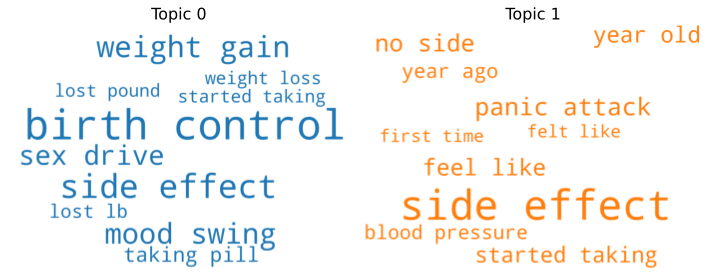

<Figure size 432x288 with 0 Axes>

In [ ]:
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(10,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

plt.savefig('/wc_bigram_lda-2.svg')


Coherence

In [ ]:
lda1 = models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes=10)

In [ ]:
import re
import string

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/MIS6-Sem6/drugsCom/drugsComTest_raw.tsv',sep=None)
df_test = pd.read_csv('/content/drive/MyDrive/MIS6-Sem6/drugsCom/drugsComTest_raw.tsv',sep=None)
drug_per_condition = df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_1=drug_per_condition[drug_per_condition<=10].keys()
df_test1=df_test[~df_test['condition'].isin(condition_1)]
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric=lambda x: re.sub('[^a-zA-Z]', ' ', str(x))
punc_lower=lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
split=lambda x: x.split()

df_test1['review'] = df_test1.review.map(alphanumeric).map(punc_lower).map(split)
texts=df_test1['review'].to_list()


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
import gensim.corpora as corpora
id2word1=corpora.Dictionary(texts)

In [ ]:
from gensim.models import CoherenceModel

coherence=CoherenceModel(model=lda1,texts=texts,dictionary=id2word1,coherence='c_v')
coherence_lda=coherence.get_coherence()
print("Score:",coherence_lda)

Score: 0.8082018174283375


In [ ]:
lda1.print_topics()

[(0,
  '0.024*"birth control" + 0.011*"mood swing" + 0.010*"weight gain" + 0.009*"sex drive" + 0.009*"side effect" + 0.004*"taking pill" + 0.003*"gain weight" + 0.003*"control pill" + 0.003*"gained lb" + 0.003*"take pill"'),
 (1,
  '0.035*"side effect" + 0.007*"feel like" + 0.006*"no side" + 0.005*"year ago" + 0.005*"started taking" + 0.005*"much better" + 0.004*"year old" + 0.003*"feel better" + 0.003*"anxiety depression" + 0.003*"could not"'),
 (2,
  '0.023*"side effect" + 0.007*"blood pressure" + 0.005*"dry mouth" + 0.005*"lost lb" + 0.004*"weight loss" + 0.004*"started taking" + 0.004*"no side" + 0.004*"lost pound" + 0.003*"work well" + 0.003*"lose weight"'),
 (3,
  '0.013*"panic attack" + 0.006*"year old" + 0.004*"felt like" + 0.004*"go away" + 0.003*"would not" + 0.003*"yeast infection" + 0.003*"went away" + 0.003*"feel like" + 0.003*"anxiety panic" + 0.003*"first time"')]

In [ ]:
all_topics = lda1.get_document_topics(corpus)
all_topics

In [ ]:
num_docs = len(all_topics)

In [ ]:
lda_corpus1 = lda1[corpus]
lda_corpus1

In [ ]:
lda_docs1 = [doc for doc in lda_corpus1]

In [ ]:
lda_docs1[0:5]

[[(0, 0.28783017), (1, 0.5922453), (2, 0.012845856), (3, 0.10707865)],
 [(0, 0.102151714), (1, 0.018133461), (2, 0.8616583), (3, 0.018056536)],
 [(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)],
 [(0, 0.074303105), (1, 0.23934151), (2, 0.43456542), (3, 0.25179)],
 [(0, 0.7490548), (2, 0.1490675), (3, 0.09401318)]]

In [ ]:
len(lda_docs1)

46130

In [ ]:
def dominant_topic(ldamodel, corpus, texts):
     #Function to find the dominant topic in each review
     sent_topics_df = pd.DataFrame() 
     # Get main topic in each review
     for i, row in enumerate(ldamodel[corpus]):
         row = sorted(row, key=lambda x: (x[1]), reverse=True)
         # Get the Dominant topic, Perc Contribution and Keywords for each review
         for j, (topic_num, prop_topic) in enumerate(row):
             if j == 0:  # => dominant topic
                 wp = ldamodel.show_topic(topic_num,topn=4)
                 topic_keywords = ", ".join([word for word, prop in wp])
                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
             else:
                 break
     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
     contents = pd.Series(texts)
     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
     return(sent_topics_df)

df_dominant_topic = dominant_topic(ldamodel=lda1, corpus=corpus, texts=df_train_s['review']) 
df_dominant_topic.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,review
0,1.0,0.5922,"side effect, feel like, no side, year ago",tried antidepressant year citalopram fluoxetin...
1,2.0,0.8617,"side effect, blood pressure, dry mouth, lost lb",son crohn disease done well asacol no complain...
2,0.0,0.2500,"birth control, mood swing, weight gain, sex drive",quick reduction symptom
3,2.0,0.4346,"side effect, blood pressure, dry mouth, lost lb",contrave combine drug used alcohol smoking opi...
4,0.0,0.7492,"birth control, mood swing, weight gain, sex drive",birth control one cycle reading review type si...


In [ ]:
#export topic keywords to csv file for later use
export_csv = df_dominant_topic.to_csv(r'df_dominant_topic.csv', index = None, header=True)

In [ ]:

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics1 = lda1.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(6,6), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words1 = dict(topics1[i][1])
    cloud.generate_from_frequencies(topic_words1, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

plt.savefig('wc_bigram_lda-4.svg')

In [ ]:
lda2 = models.LdaModel(corpus=corpus, num_topics=6, id2word=id2word, passes=10)

In [ ]:
lda2.print_topics()

[(0,
  '0.004*"feel like" + 0.004*"started taking" + 0.004*"two week" + 0.003*"would not" + 0.003*"really bad" + 0.003*"go away" + 0.003*"felt like" + 0.003*"since started" + 0.003*"not good" + 0.003*"started using"'),
 (1,
  '0.007*"back pain" + 0.005*"work well" + 0.004*"could not" + 0.003*"felt like" + 0.003*"year ago" + 0.003*"first time" + 0.003*"worked great" + 0.003*"not take" + 0.003*"lower back" + 0.002*"doctor prescribed"'),
 (2,
  '0.086*"side effect" + 0.018*"no side" + 0.007*"dry mouth" + 0.006*"go away" + 0.004*"lost lb" + 0.004*"lost pound" + 0.004*"weight loss" + 0.003*"started taking" + 0.003*"hot flash" + 0.003*"not sure"'),
 (3,
  '0.011*"blood pressure" + 0.005*"feel like" + 0.004*"first time" + 0.003*"make feel" + 0.003*"year old" + 0.003*"not sure" + 0.003*"yeast infection" + 0.003*"not worth" + 0.003*"high blood" + 0.003*"could not"'),
 (4,
  '0.016*"panic attack" + 0.009*"side effect" + 0.009*"year old" + 0.007*"year ago" + 0.007*"started taking" + 0.007*"feel l

In [ ]:
lda_corpus2 = lda2[corpus]
lda_corpus2

In [ ]:
lda_docs2 = [doc for doc in lda_corpus2]

In [ ]:
lda_docs2[0:5]

[[(1, 0.29751045),
  (2, 0.092366844),
  (3, 0.2789058),
  (4, 0.164803),
  (5, 0.15808055)],
 [(0, 0.0119162155),
  (1, 0.80641276),
  (2, 0.14575396),
  (3, 0.01192103),
  (4, 0.011945959),
  (5, 0.012050025)],
 [(0, 0.16666667),
  (1, 0.16666667),
  (2, 0.16666667),
  (3, 0.16666667),
  (4, 0.16666667),
  (5, 0.16666667)],
 [(1, 0.15742457), (2, 0.7608982), (4, 0.060728546)],
 [(2, 0.15078112), (3, 0.35296893), (5, 0.4822947)]]

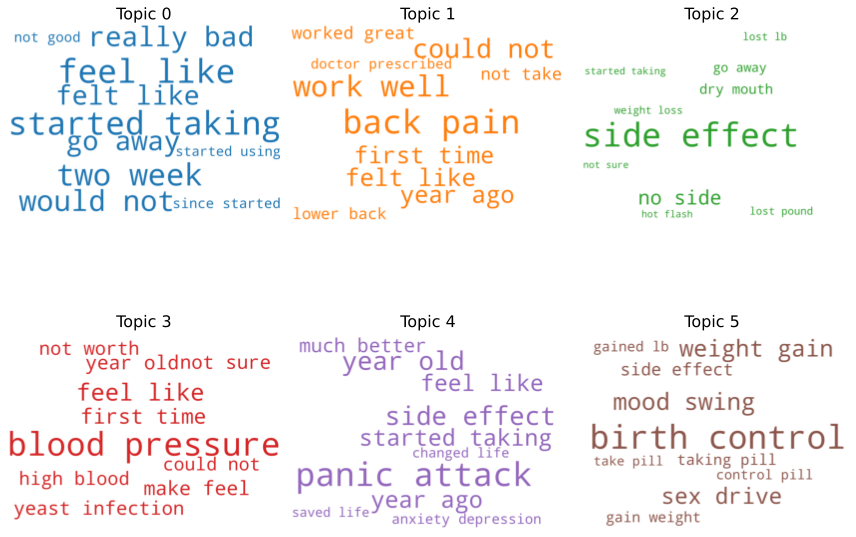

<Figure size 432x288 with 0 Axes>

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics2 = lda2.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(12,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words2 = dict(topics2[i][1])
    cloud.generate_from_frequencies(topic_words2, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

plt.savefig('wc_bigram_lda-6.svg')

In [ ]:
new_doc=['She had to use birth control']

In [ ]:
import gensim

In [ ]:
def topic_distribution(doc, num_topics = 4):
    
    topics_array = np.zeros(num_topics)
    X1 = cv.transform(doc)
    corpus1 = gensim.matutils.Sparse2Corpus(X1, documents_columns=False)
    list_1 = list(lda.get_document_topics(bow=corpus1))[0]
    for items in list_1:
        topics_array[items[0]] = items[1]
    return topics_array
#for i, item in enumerate(topic_distribution(new_doc)):
#    if item > 0:
#        print(i, item)

In [ ]:
def calculate_score(doc1, new_doc):
    
    return np.dot(topic_distribution(doc1), topic_distribution(new_doc))

In [ ]:
import time

In [ ]:
def return_max_resembling_paper():
    
    max_score = 0
    start_time = time.time()
    for i, doc in enumerate(drug_list):
        score = calculate_score(new_doc, [doc])
        print("\r\t>>> Progress\t:{:.4%}".format((i + 1)/len(drug_list)), end='')
        #print(i, score, topic_distribution([doc]))
        if score > max_score:
            best_i = i
            max_score = score
    end_time = time.time()
    print("\nRunning time is {}s".format(end_time-start_time))
    return max_score, best_i

In [ ]:
score, best_i = return_max_resembling_paper()
print(">>> Best score is:", score)
print(">>> The statement given with the symptoms as remark is ")
print(new_doc[0])
print(">>> The most suitable durg that can be prescribed is ")
print(drug_list[best_i])
#for i, item in enumerate(topic_distribution([condition_list[best_i]])):
#    if item > 0:
#        print(i, item) 

	>>> Progress	:100.0000%
Running time is 70.75422215461731s
>>> Best score is: 0.7499232973115646
>>> The statement given with the symptoms as remark is 
She had to use birth control
>>> The most suitable durg that can be prescribed is 
Ortho Tri-Cyclen Lo


In [ ]:
from nltk.stem import WordNetLemmatizer
import re # Regular expression library
import string
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
